In [23]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: NVIDIA GeForce MX450 (UUID: GPU-dd763d01-9ebe-fc5b-f272-628bc2f4ca03)


In [24]:
#pip install tensorflow

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [25]:
'''
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Churn_Modelling.csv"
data = pd.read_csv(path)
data 

'''

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\npath="/content/drive/MyDrive/Churn_Modelling.csv"\ndata = pd.read_csv(path)\ndata \n\n'

In [26]:
#2
url = "https://drive.google.com/file/d/1-mT6iykRVgRU3blYpX5i_YxhbqjUJepP/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [27]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


c:\Users\Toeysam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Toeysam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Toeysam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Toeysam\anaconda

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

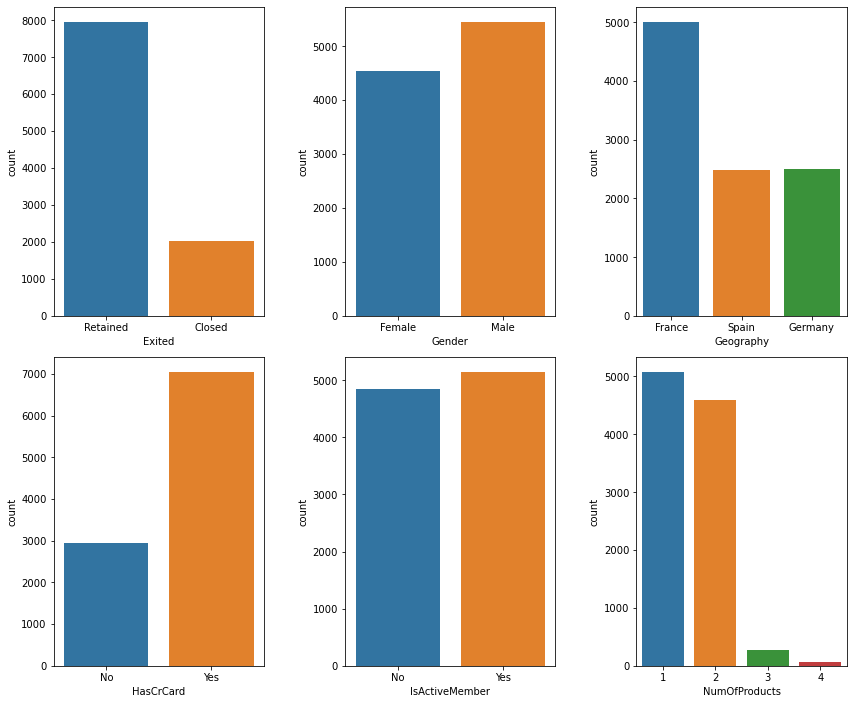

In [29]:
fig, ax = plt.subplots(2,3,figsize=(12,10))
fig.tight_layout(pad=2, w_pad=5 , h_pad=2)
sns.countplot(df['Exited'], ax=ax[0,0])
ax[0,0].set_xticklabels(["Retained", "Closed"])
sns.countplot(df['Gender'], ax=ax[0,1])
sns.countplot(df['Geography'], ax=ax[0,2])
sns.countplot(df['HasCrCard'], ax=ax[1,0])
ax[1,0].set_xticklabels(["No", "Yes"])
sns.countplot(df['IsActiveMember'], ax=ax[1,1])
ax[1,1].set_xticklabels(["No", "Yes"])
sns.countplot(df['NumOfProducts'], ax=ax[1,2])

<AxesSubplot:xlabel='Age', ylabel='Count'>

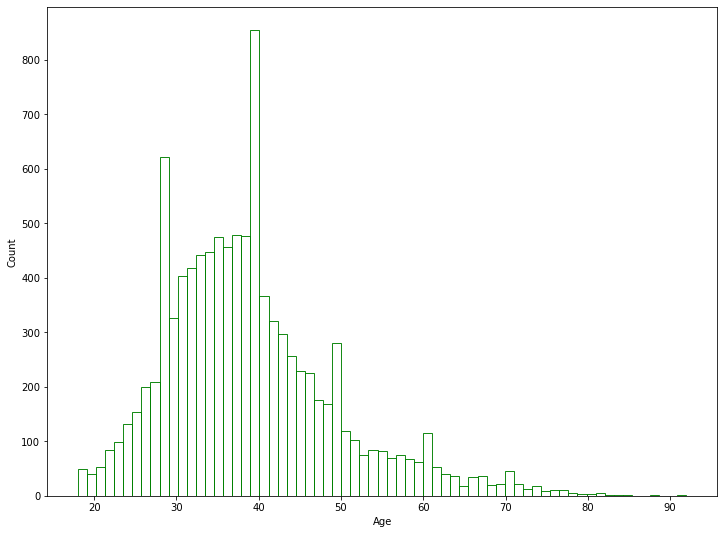

In [30]:
plt.figure(figsize=(12, 9))
sns.histplot(df['Age'],color="green",fill=False)


<AxesSubplot:xlabel='Balance', ylabel='Count'>

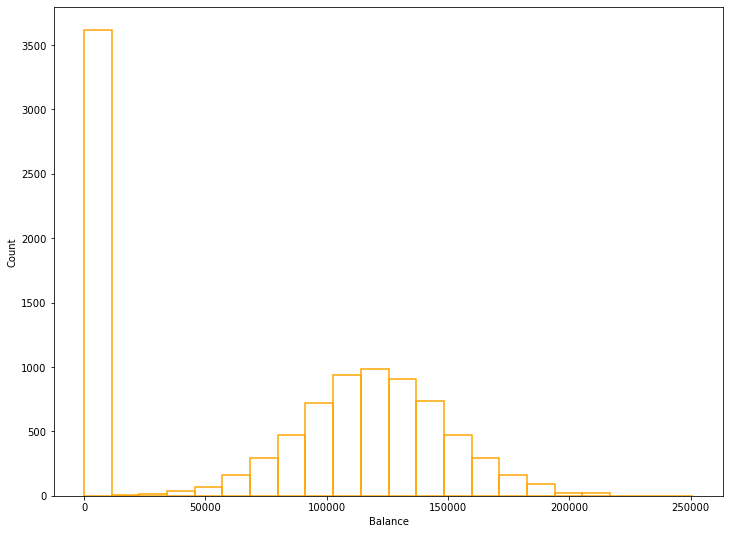

In [31]:
plt.figure(figsize=(12, 9))
sns.histplot(df['Balance'],color="orange",fill=False)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

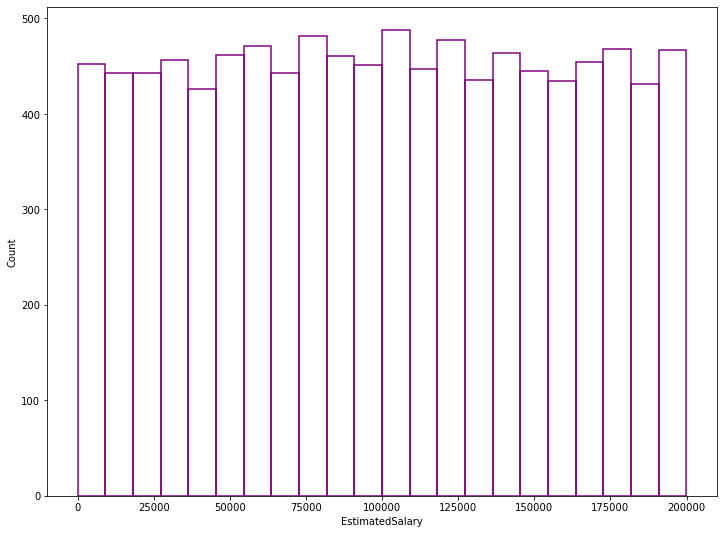

In [32]:
plt.figure(figsize=(12, 9))
sns.histplot(df['EstimatedSalary'],color="purple",fill=False)

In [33]:
#Cleansing+Normalize

In [34]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [35]:
df['Gender'].replace(['Female'],0 , inplace=True)

In [36]:
df['Gender'].replace(['Male'],1 , inplace=True)

In [37]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [38]:
dummy=pd.get_dummies(df.Geography)
df=pd.concat([df, dummy], axis=1)
df.drop('Geography', axis=1, inplace=True)

In [39]:
y = df['Exited']
df.drop(columns=['Exited'], axis=1, inplace=True)

In [40]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scalar = preprocessing.MinMaxScaler()
col=df.columns
df=scalar.fit_transform(df)
df=pd.DataFrame(df,columns=col)

In [42]:
df=pd.DataFrame(df,columns=col)

In [43]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0
9996,0.332,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0
9997,0.718,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0
9998,0.844,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0


In [44]:
#pip install imblearn
#pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto',k_neighbors=1,random_state=1234)
X_data, Y_data = smote.fit_resample(df,y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
X_data

In [ ]:
sns.countplot(Y_data)

In [ ]:
#ML

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data , Y_data , test_size = 0.3, random_state = 0)

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score , roc_curve , roc_auc_score , confusion_matrix

In [ ]:
def predict_y(X_test,model):
  if str(type(model)) == "<class 'keras.engine.sequential.Sequential'>":
    Y_predict = model.predict(X_test)
    for i in range(0, len(Y_predict)):
      if Y_predict[i] > 0.5:
        Y_predict[i] = 1
      else:
        Y_predict[i] = 0
  else:
    Y_predict=model.predict(X_test)
  return Y_predict

In [ ]:
def acc_score(X_test,Y_test,model):
  Y_predict = predict_y(X_test,model)
  acc = accuracy_score(Y_test, Y_predict)
  print(f"Accuracy = {acc*100:.2f}%")

def class_report (X_test,Y_test,model):
  Y_predict = predict_y(X_test,model)
  #print(classification_report(Y_test,Y_predict))

  #code for indent report problem below
  rp=classification_report(Y_test,Y_predict,output_dict=True)
  rpd=pd.DataFrame(rp).transpose()
  rpd.rename(index={'0.0':'retrained','1.0':'closed'},inplace=True)
  #rpd.drop(index='accuracy',inplace=True)
  rpd = rpd.astype({'support':'int'})
  pd.set_option('display.float_format', '{:.4f}'.format)
  print(f'\nClassification Report\n')
  mx=rpd['support'].max()
  rpd['support'].replace(0,mx,inplace=True)
  display(rpd)


def plot_crv(X_test,Y_test,model):
  Prob_Y_predict = model.predict_proba(X_test)[::,1]
  print(f"\nAUC_ROC = {roc_auc_score(Y_test,Prob_Y_predict)*100:.2f}%\n")
  fpr, tpr, _ = metrics.roc_curve(Y_test,  Prob_Y_predict)
  plt.plot(fpr,tpr)
  plt.plot([0,1], [0,1], 'red')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

def plot_cfm(X_test,Y_test,model):
  if str(type(model)) == "<class 'keras.engine.sequential.Sequential'>":
    shd='Purples'
  else:
    shd='YlGnBu'
  Y_predict = predict_y(X_test,model)
  cf_matrix = confusion_matrix(Y_test, Y_predict)
  print("\nConfusion Matrix")
  print(cf_matrix)
  ax = sns.heatmap(cf_matrix, annot=True, cmap=shd,fmt='g')

  ax.set_title('Confusion Matrix Heatmap');
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(['Retrained','Closed'])
  ax.yaxis.set_ticklabels(['Retrained','Closed'])
  plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
acc_score(X_test,Y_test,DT)
class_report (X_test,Y_test,DT)
plot_crv(X_test,Y_test,DT)
plot_cfm(X_test,Y_test,DT)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
acc_score(X_test,Y_test,RF)
class_report (X_test,Y_test,RF)
plot_crv(X_test,Y_test,RF)
plot_cfm(X_test,Y_test,RF)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train, Y_train)
acc_score(X_test,Y_test,GB)
class_report (X_test,Y_test,GB)
plot_crv(X_test,Y_test,GB)
plot_cfm(X_test,Y_test,GB)

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate = 0.1, n_estimators = 180, max_depth = 3)
xgb_model.fit(X_train, Y_train)
acc_score(X_test,Y_test,xgb_model)
class_report (X_test,Y_test,xgb_model)
plot_crv(X_test,Y_test,xgb_model)
plot_cfm(X_test,Y_test,xgb_model)

In [ ]:
#MLP 

In [ ]:
np.random.seed(1150)
tf.random.set_seed(1112)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
mlp_model = tf.keras.models.Sequential()

# Input layer
mlp_model.add( tf.keras.Input(shape=(12,)) )

# Hidden layer
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden1') )  
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden2') )   
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden3') )   
mlp_model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn3') )
mlp_model.add( tf.keras.layers.Dense(20, activation='relu', name='hidden4') )   
mlp_model.add( tf.keras.layers.Dropout(0.3) )                     

# Output layer
mlp_model.add(Dense(1, activation = 'sigmoid'))


mlp_model.summary()

In [ ]:
mlp_model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
#model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )

In [ ]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                              save_weights_only=True,
                                                                                              monitor='val_acc',
                                                                                              mode='max',
                                                                                              save_best_only=True)

In [ ]:
history = mlp_model.fit ( X_train, Y_train, batch_size=128, epochs=25, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback] )

In [ ]:
!ls -lt

In [ ]:
#delete all save file in directory
#!rm *

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
results = mlp_model.evaluate(X_test, Y_test, batch_size=128)
print( f"{mlp_model.metrics_names} = {results}" )

In [ ]:
acc_score(X_test,Y_test,mlp_model)
class_report (X_test,Y_test,mlp_model)
plot_cfm(X_test,Y_test,mlp_model)